In [1]:
%pip install qiskit
%pip install quantum_simulation_recipe
%pip install matplotlib
%pip install numpy
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, random_clifford, Pauli, Operator, partial_trace, entropy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
from quantum_simulation_recipe.trotter import *
from quantum_simulation_recipe.bounds import norm, tight_bound, commutator
from quantum_simulation_recipe.plot_config import *
from time import sleep
from tqdm import tqdm

def Tensor_product(matrix,power):
    if power==0:
        return [[1]]
    else:
        j=1
        m=matrix
        while j<power:
            m=np.kron(m,matrix)
            j+=1
        return m


In [34]:
# Model: 1D Heisenberg model
n=10
dim=2**n
r=1
delta_t=0.1
t=delta_t*r

J,h=1,1.2
order=2
hnn=Nearest_Neighbour_1d(n=n,Jx=J,Jy=J,Jz=J,hx=h,hy=0,hz=0,pbc=True)
h_list=hnn.ham_xyz
approx_U=pf(h_list,t=t,r=r,order=1)
exact_U=expH(hnn.ham,t=t)
#observables to be measured
Observables_with_different_BK=[]
i=0
while i<=n:
    paulis=Pauli('Y'*i).to_matrix()
    projectures=Tensor_product([[1,0],[0,0]],n-i)
    observable=np.kron(paulis,projectures)
    Observables_with_different_BK.append(observable)
    i+=1  
#fixed initial state
Initial_state=Statevector.from_int(0,dim).data

Exact value: 0.8655873951876714, Approximate value: 0.8575709761781285, Error: 0.008016419009542863
Exact value: -0.20874390882037921, Approximate value: -0.21462061093793897, Error: 0.005876702117559751
Exact value: 0.05034040434491698, Approximate value: 0.05366573755535313, Error: 0.0033253332104361474
Exact value: -0.012140025181718403, Approximate value: -0.005311756467478994, Error: 0.006828268714239409
Exact value: 0.002927672380280322, Approximate value: -0.0006339141249950487, Error: 0.003561586505275371
Exact value: -0.0007060335903720917, Approximate value: 0.0006314567240270322, Error: 0.001337490314399124
Exact value: 0.00017026612475197015, Approximate value: -0.00019691016900384676, Error: 0.0003671762937558169
Exact value: -4.106115294425993e-05, Approximate value: 4.16856889855421e-05, Error: 8.274684192980202e-05
Exact value: 9.902253214301807e-06, Approximate value: -4.372349869965346e-06, Error: 1.4274603084267153e-05
Exact value: -2.3880142589580558e-06, Approximat

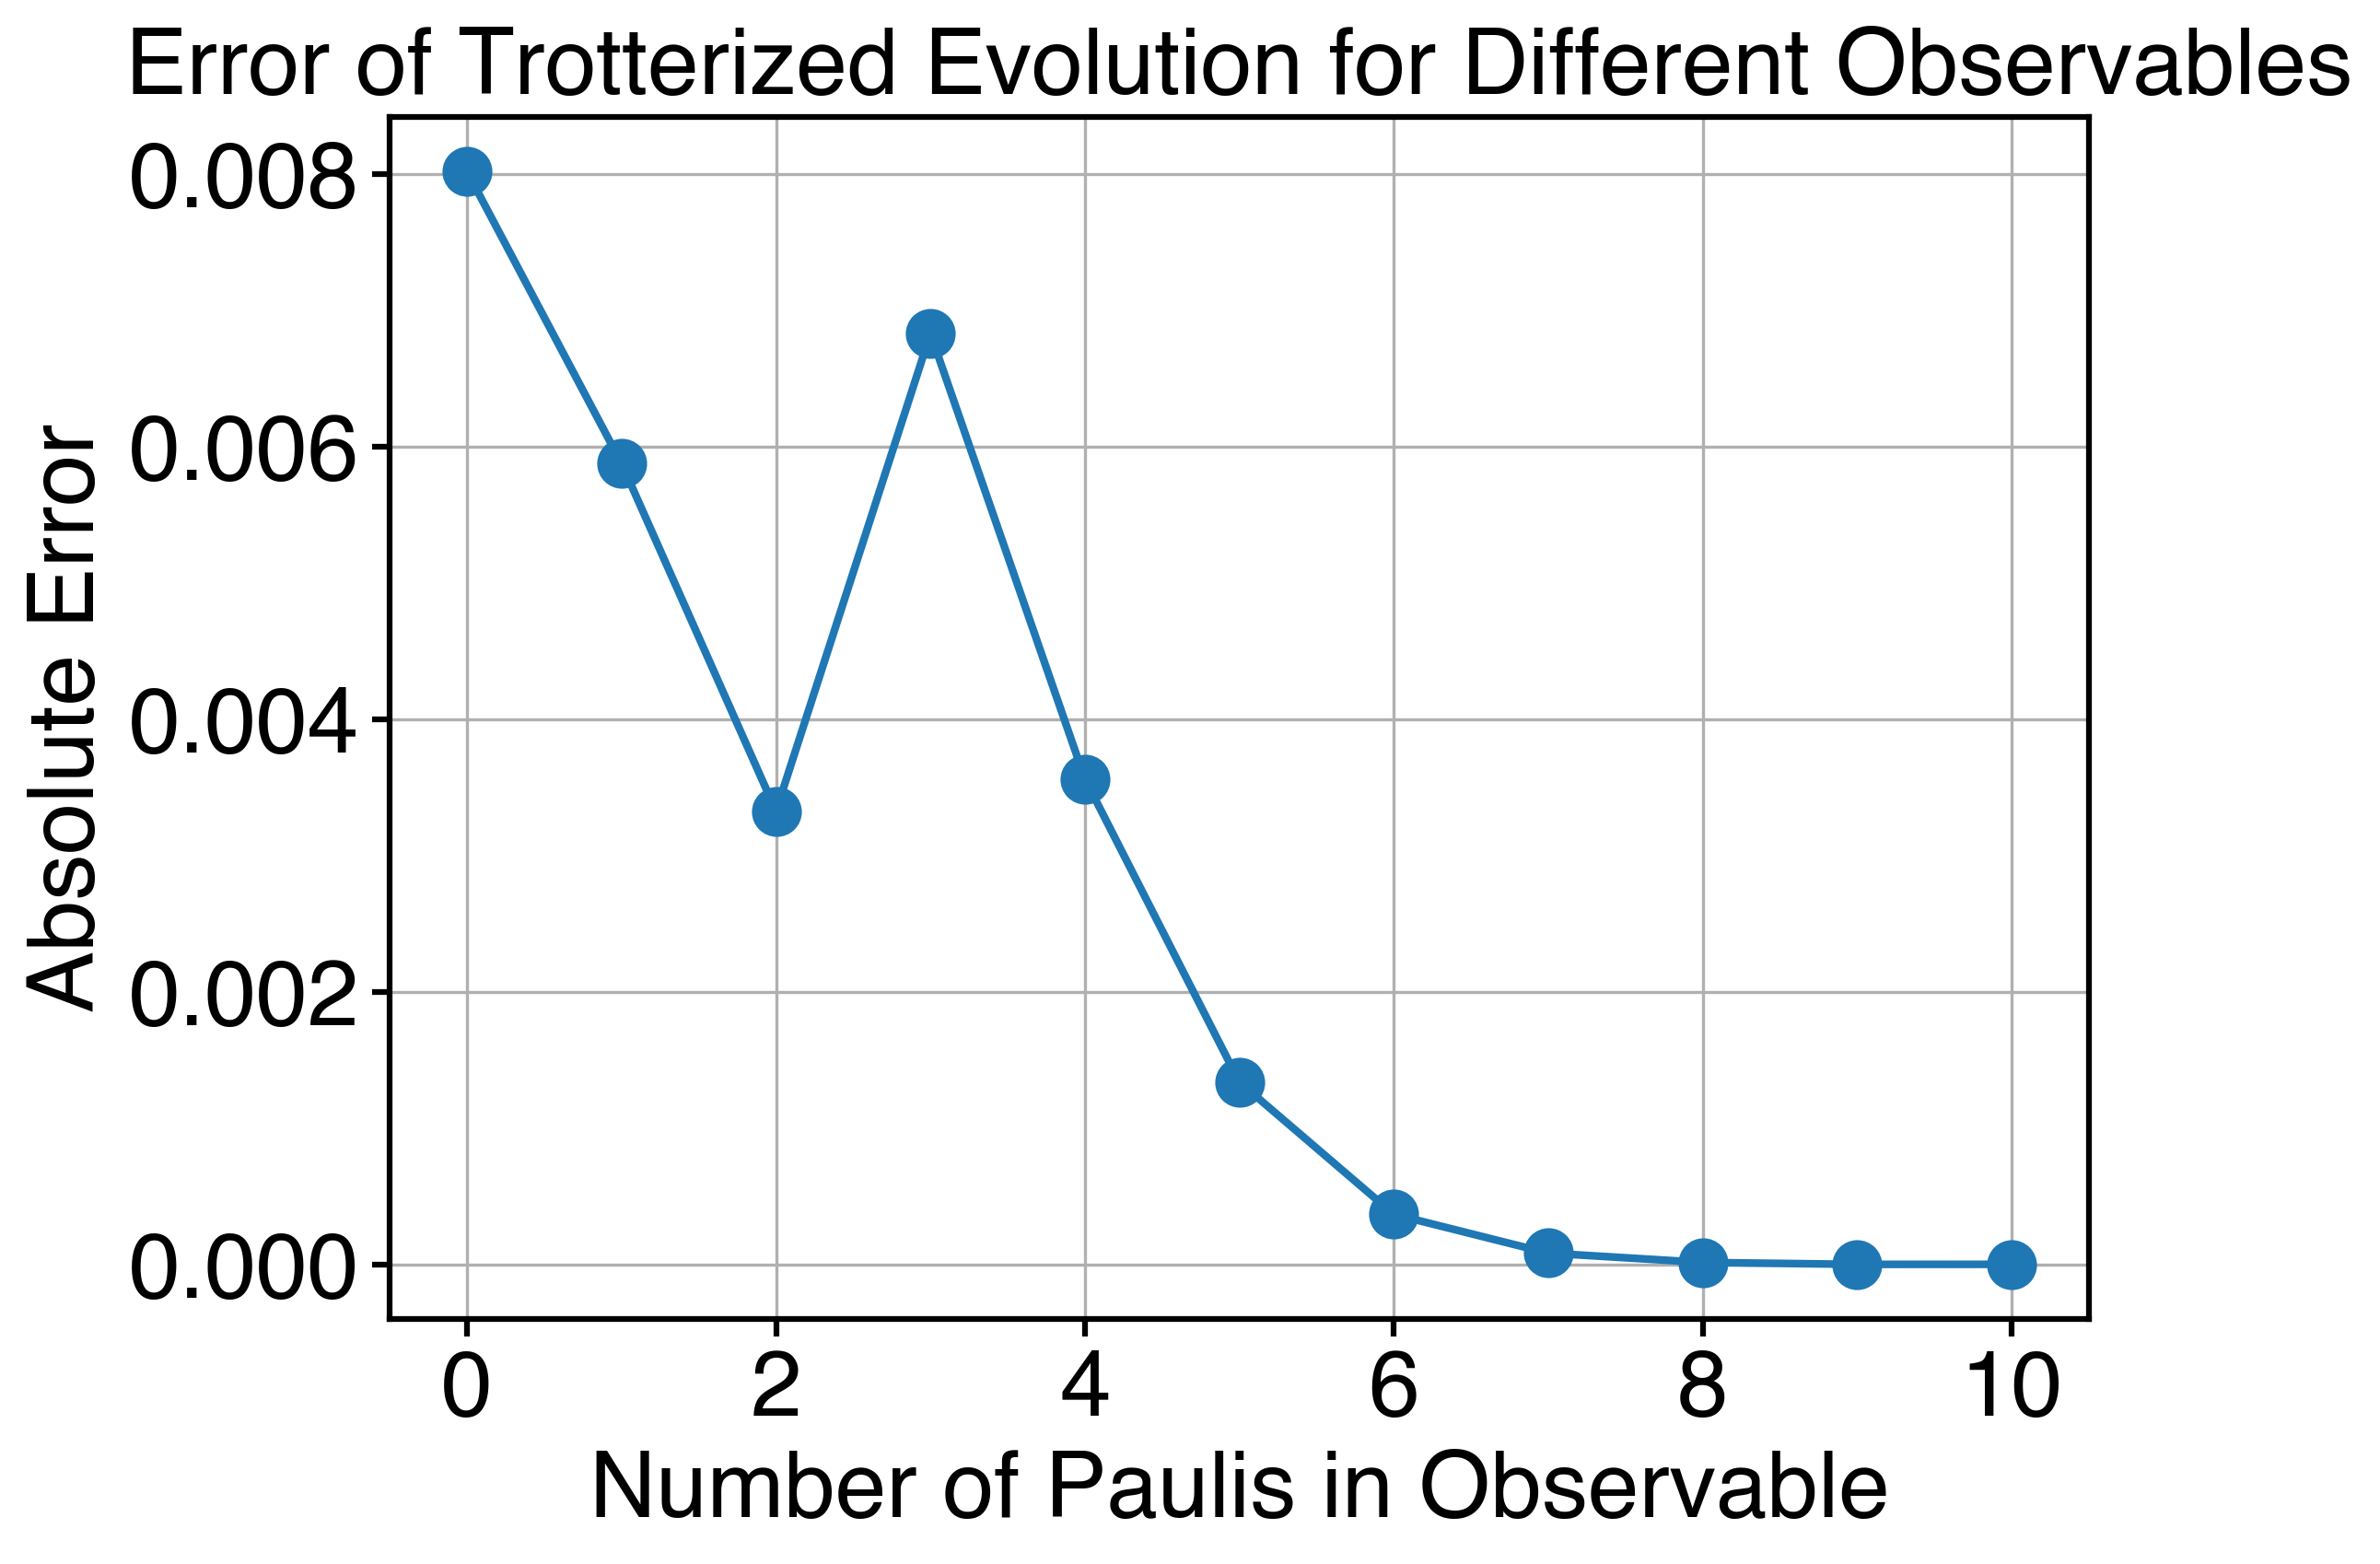

In [35]:
errors=[]
for observable in  Observables_with_different_BK:
    exact_value=np.real(Statevector(exact_U@Initial_state).expectation_value(observable))
    approx_value=np.real(Statevector(approx_U@Initial_state).expectation_value(observable))
    print(f"Exact value: {exact_value}, Approximate value: {approx_value}, Error: {abs(exact_value-approx_value)}")
    errors.append(abs(exact_value-approx_value))
plt.figure(figsize=(8,6))
plt.plot(range(n+1), errors, marker='o')
#plt.yscale('log')
plt.xlabel('Number of Paulis in Observable')
plt.ylabel('Absolute Error')
plt.title('Error of Trotterized Evolution for Different Observables')
plt.grid()
plt.show()